In [308]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [309]:
import sys
sys.path.append("../scripts")

In [310]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [311]:
plt.rcParams["figure.figsize"] = (14,6)

In [312]:
obs = pd.read_csv("../data/obs-ar.csv", parse_dates=["date"])
obs = obs.set_index("date")
obs = obs.drop(columns=["C"])
obs

,I,R,D
date,,,
2020-03-07,1,0,0
2020-03-08,3,0,0
2020-03-09,5,0,0
2020-03-10,7,0,0
2020-03-11,10,0,0
...,...,...,...
2020-06-05,12280,5618,573
2020-06-06,12894,5817,590
2020-06-07,13500,6042,608


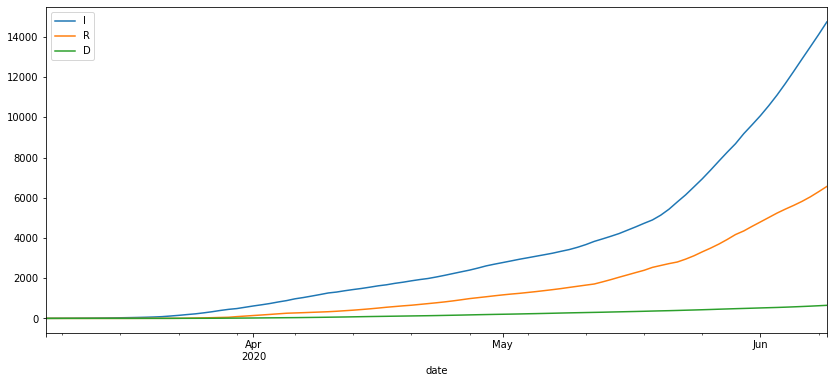

In [313]:
obs.plot()

In [314]:
train = obs.iloc[:-15]
test = obs.iloc[-15:]

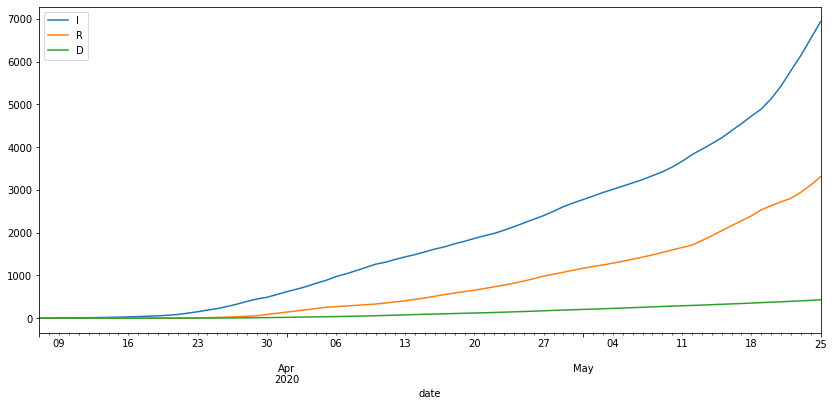

In [315]:
train.plot()

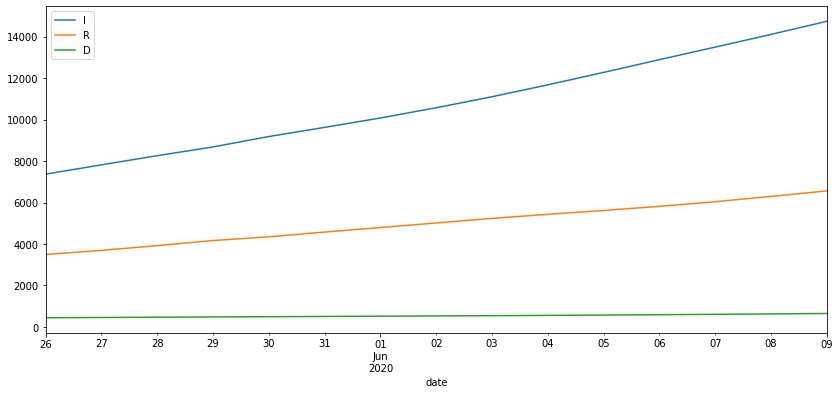

In [316]:
test.plot()

# Piecewise SIR

In [317]:
from SEIR import SIR

In [320]:
model = SIR(population = 4e6, init_infected=1, init_recovered=0, init_dead=0)

In [321]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality"), batch_size=7, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!
----------------------
Batch 5

Fitting...
Simulating...
Done!
----------------------
Batch 6

Fitting...
Simulating...
Done!
----------------------
Batch 7

Fitting...
Simulating...
Done!
----------------------
Batch 8

Fitting...
Simulating...
Done!
----------------------
Batch 9

Fitting...
Simulating...
Done!
----------------------
Batch 10

Fitting...
Simulating...
Done!


In [322]:
pred = model.simulate(len(test))
pred.index = test.index

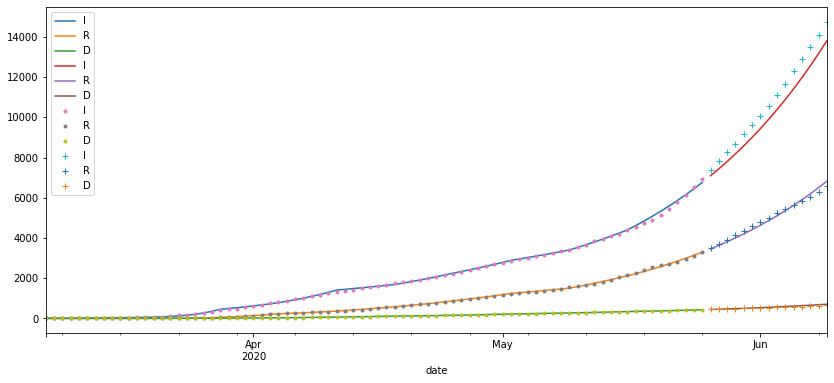

In [323]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")

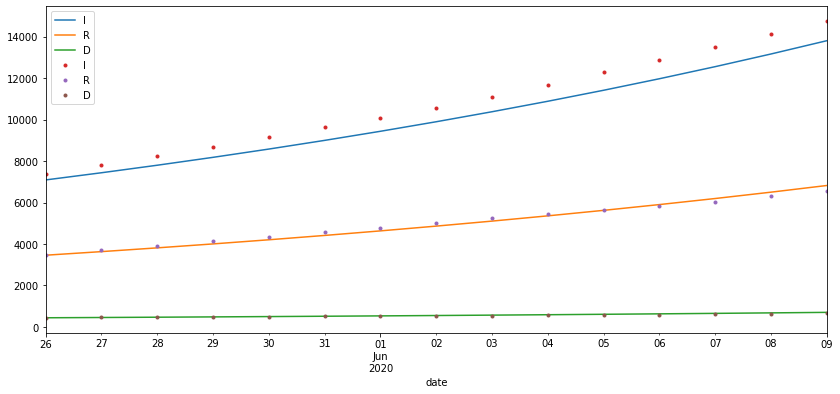

In [324]:
ax = pred.plot()
test.plot(ax=ax, style=".")

In [327]:
model.piecewise_params

,population,r_transmission,r_recovery,r_mortality
0,4000000.0,0.492150,0.000037,0.019203
1,4000000.0,0.142302,0.000084,0.002797
2,4000000.0,0.298395,0.032610,0.003848
3,4000000.0,0.125959,0.043133,0.005542
4,4000000.0,0.106471,0.017921,0.004321
5,4000000.0,0.049605,0.019553,0.004516
6,4000000.0,0.066026,0.021678,0.002999
7,4000000.0,0.060193,0.020671,0.003689
8,4000000.0,0.037674,0.011988,0.002313
9,4000000.0,0.062043,0.022585,0.002501


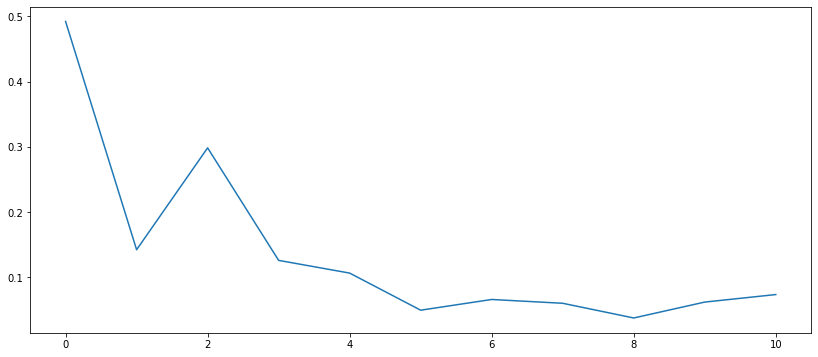

In [328]:
model.piecewise_params.r_transmission.plot()

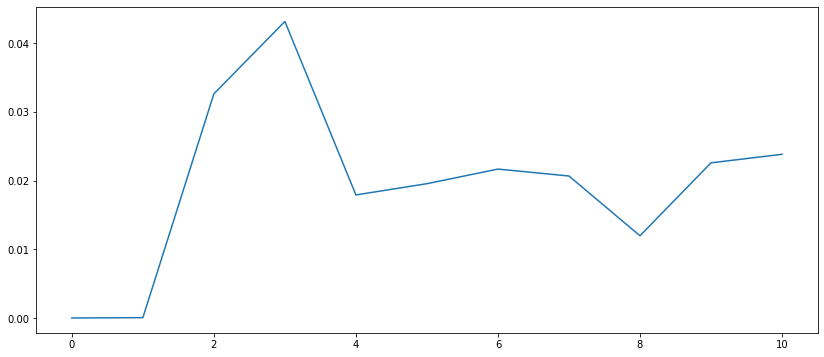

In [329]:
model.piecewise_params.r_recovery.plot()

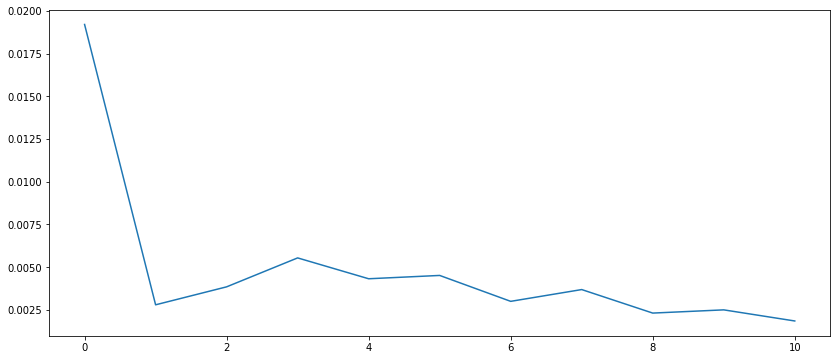

In [330]:
model.piecewise_params.r_mortality.plot()

# Piecewise SEIR

In [331]:
from SEIR import SEIR

In [332]:
model = SEIR(population=1e4, init_exposed=1, init_infected=1, init_recovered=0, init_dead=0)

In [333]:
model.fit_piecewise(train, estimate=('r_transmission', "r_recovery", "r_mortality", "r_progression", "population"), 
                    batch_size=10, keep_remainder=True)

----------------------
Batch 0

Fitting...
Simulating...
Done!
----------------------
Batch 1

Fitting...
Simulating...
Done!
----------------------
Batch 2

Fitting...
Simulating...
Done!
----------------------
Batch 3

Fitting...
Simulating...
Done!
----------------------
Batch 4

Fitting...
Simulating...
Done!
----------------------
Batch 5

Fitting...
Simulating...
Done!
----------------------
Batch 6

Fitting...
Simulating...
Done!
----------------------
Batch 7

Fitting...
Simulating...
Done!


In [334]:
pred = model.simulate(len(test))
pred.index = test.index

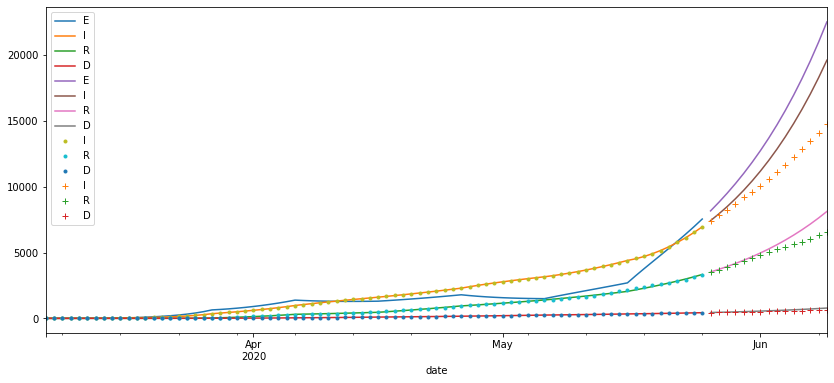

In [335]:
ax = model.y_fit.plot()
pred.plot(ax=ax)
train.plot(ax=ax, style=".")
test.plot(ax=ax, style="+")